# Tidy Survey

This document exhibit the process of cleaning and organizing survey data. First, let's load some packages.

In [121]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor import *

plt.style.use('ggplot')
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**The data processing methods are written as class funciton.** This file also shows my logic behind compsing the class script. 

### 1. read data.

In [2]:
survey = survey('data/survey')

### 2. simplify column labels and filter population of interest

In [8]:
survey.rough_process()

In [9]:
df = survey.data.copy()

### 3. Check string asnwers in numeric features. Label string as nan, then do t-test. If the p value from t-test is significant, then should dummie string as boolean variable, otherwise impute string with median. 

In [46]:
bs = ['Not applicable', 'No answer', "Don't know" ]

In [111]:
num_cols = ['sphrs1','agekdbrn','paeduc','maeduc','speduc']

In [112]:
check_impute(df,num_cols,df.employed,bs)

defaultdict(float,
            {'agekdbrn': 0.80652824893845687,
             'maeduc': 1.5957833915685355e-09,
             'paeduc': 0.00080774247657822325,
             'speduc': 0.030287323494609907,
             'sphrs1': 0.45803397978756955})

sphrs1 and agekdbrn can be imputed with median. However, string answers in maeduc, paeduc and speduc are not imputable. now let's take a look into these features.

BS ratio: 0.151198934281
BS number: 681


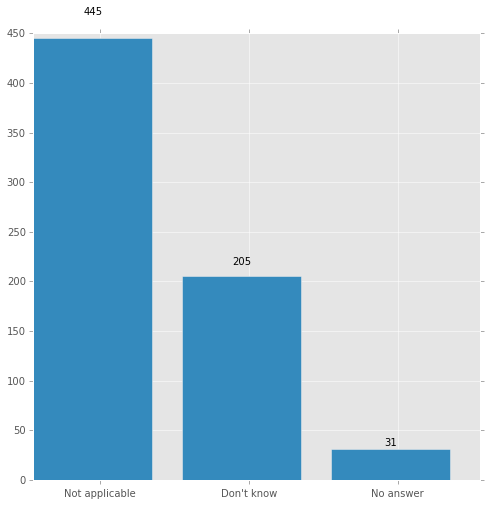

In [154]:
check_bs(df.maeduc,bs)

In [182]:
temp_df = pd.concat([df.maeduc,df.employed],axis =1)

In [183]:
temp_df.columns

Index([u'maeduc', u'employed'], dtype='object')

In [189]:
numbs=temp_df.maeduc.replace(bs,np.nan).unique()


In [213]:
d2 = temp_df[temp_df.maeduc.apply(lambda x: (x =="Don't know") or (x in numbs))]

/home/yihua/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if __name__ == '__main__':
/home/yihua/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':


In [214]:
d2.maeduc.replace("Don't know", np.nan, inplace=True)
ttest_by(d2.employed,pd.isnull(d2.maeduc))

Ttest_indResult(statistic=-6.6489258728069984, pvalue=3.3484680532314981e-11)

In [200]:
check_impute(d2,['maeduc'],d2.employed,["Don't know"]).values()[0]

3.3484680532314981e-11

In [223]:
from collections import defaultdict
import pdb

def check_each(df,col,target = "employed",bs = ['Not applicable', 'No answer', "Don't know" ]):
    temp_df = pd.concat([df[col],df[target]],axis = 1)
    numbs = temp_df[col].replace(bs,np.nan).unique()
    for b in bs:
        d2 = temp_df[temp_df[col].apply(lambda x: x==b or x in numbs)]
        d2[col].replace(b,np.nan,inplace = True)
        p = ttest_by(d2[target],pd.isnull(d2[col]))[1]
        print b,p

            

In [224]:
check_each(df,'maeduc')

Not applicable 0.00100165855609
No answer 0.857729540015
Don't know 3.34846805323e-11


/home/yihua/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/yihua/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


**This result indicated that we can impute "no answer" in "maeduc" column.**

BS ratio: 0.331039076377
BS number: 1491


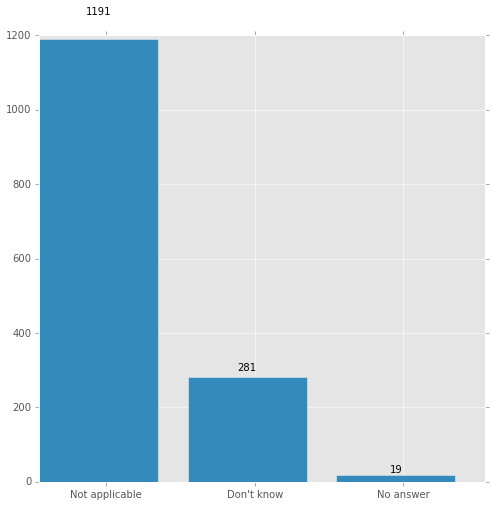

In [225]:
check_bs(df.paeduc,bs)

In [226]:
check_each(df,"paeduc")

Not applicable 0.0307036670413
No answer 0.818306252525
Don't know 4.24835727965e-05


/home/yihua/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/yihua/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


** same, impute "No answer" in "paeduc" column **

BS ratio: 0.472246891652
BS number: 2127


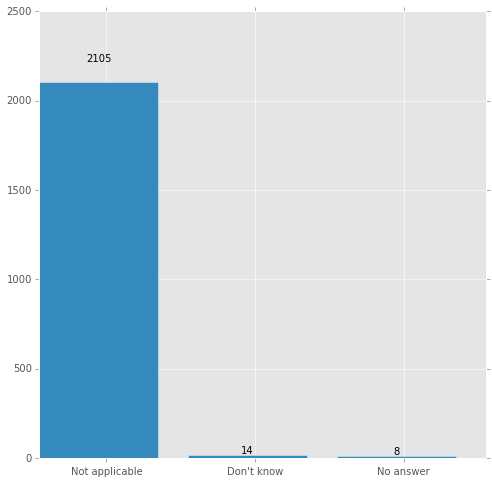

In [227]:
check_bs(df.speduc,bs)

In [228]:
check_each(df,"speduc")

Not applicable 0.0320944460559
No answer 0.456107939937
Don't know 0.222561771638


/home/yihua/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/yihua/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


** impute "No answer" and "Don't know" in 